In [1]:
import numpy as np 
import pandas as pd 
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns


from countries import get_country_list

# Land Cover
Data about land cover of several OECD and non OECD countries (https://stats.oecd.org/Index.aspx?DataSetCode=LAND_COVER#)

## Data Specifications
The obtained data set contains several variables about the land cover of given countries. The values are stored as relative numbers to the total area and as absolute numbers in square kilometers. The data is recorded for the years 1992, 2004, 2015 and 2018. We want to investigate whether we can use the latest record as an approximation of the 2020 data, as we expect that the texture of the land does not change significantly over a short period of time.

In [2]:
DATA_PATH = Path('./data')
LAND_COVER = DATA_PATH / 'OECD' / 'LAND_COVER_DATA.csv'

land_cover = pd.read_csv(LAND_COVER)
land_cover.shape

(17694, 21)

In [3]:
land_cover.head()

,COU,Country,SMALL_SUBNATIONAL_REGION,Small subnational region,LARGE_SUBNATIONAL_REGION,Large subnational region,MEAS,Measure,VARIABLE,Land cover class,...,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,TOTAL,Total,TOTAL,Total,THOUSAND_SQKM,Square kilometers (000's),FOREST,Tree cover,...,1992,NaN,NaN,0,Units,NaN,NaN,911.890687,NaN,NaN
1,AUS,Australia,TOTAL,Total,TOTAL,Total,THOUSAND_SQKM,Square kilometers (000's),FOREST,Tree cover,...,2004,NaN,NaN,0,Units,NaN,NaN,890.559607,NaN,NaN
2,AUS,Australia,TOTAL,Total,TOTAL,Total,THOUSAND_SQKM,Square kilometers (000's),FOREST,Tree cover,...,2015,NaN,NaN,0,Units,NaN,NaN,896.524077,NaN,NaN
3,AUS,Australia,TOTAL,Total,TOTAL,Total,THOUSAND_SQKM,Square kilometers (000's),FOREST,Tree cover,...,2018,NaN,NaN,0,Units,NaN,NaN,904.706598,NaN,NaN
4,AUS,Australia,TOTAL,Total,TOTAL,Total,THOUSAND_SQKM,Square kilometers (000's),GRSL,Grassland,...,1992,NaN,NaN,0,Units,NaN,NaN,1205.405426,NaN,NaN


In [4]:
#number of unique values per column
land_cover.nunique()

COU                           246
Country                       246
SMALL_SUBNATIONAL_REGION        1
Small subnational region        1
LARGE_SUBNATIONAL_REGION        1
Large subnational region        1
MEAS                            2
Measure                         2
VARIABLE                        9
Land cover class                9
YEA                             4
Year                            4
Unit Code                       0
Unit                            0
PowerCode Code                  1
PowerCode                       1
Reference Period Code           0
Reference Period                0
Value                       12556
Flag Codes                      0
Flags                           0
dtype: int64

In [5]:
#for our analysis we use the relative data, to make it comparable across countries of different sizes
land_cover = land_cover[land_cover['MEAS'] == 'PCNT']
land_cover.shape

(8838, 21)

In [6]:
#we look at the unique countries (246 as shown before) in our new data frame 
land_cover.Country.unique()

array(['Australia', 'Belgium', 'Canada', 'Czech Republic', 'Denmark',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
       'Ireland', 'Italy', 'Japan', 'Luxembourg', 'Mexico', 'New Zealand',
       'Norway', 'Poland', 'Portugal', 'Slovak Republic', 'Spain',
       'Sweden', 'Switzerland', 'Turkey', 'United Kingdom',
       'United States', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Argentina', 'Aruba', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cabo Verde', 'Cayman Islands', 'Chad',
       "China (People's Republic of)", 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Djibouti',
       'Dominica

In [7]:
#There are several entries that summarize a number of countries, which we remove
remove = ['OECD - Total','European Union (28 countries)','OECD - Europe','BRIICS economies - Brazil, Russia, India, Indonesia, China and South Africa','OECD Asia Oceania','OECD America','Latin America and Caribbean','Middle East and North Africa','G20']
land_cover = land_cover[~land_cover['Country'].isin(remove)]
land_cover.shape

(8514, 21)

In [8]:
#select subset of relevant columns Country, Year, Land cover class and Value
land_cover = land_cover[['Country', 'Year', 'Land cover class', 'Value']]
land_cover.head()

,Country,Year,Land cover class,Value
16,Australia,1992,Artificial surfaces,0.100015
17,Australia,2004,Artificial surfaces,0.136482
18,Australia,2015,Artificial surfaces,0.154930
19,Australia,2018,Artificial surfaces,0.159319
20,Australia,1992,Inland water,0.171305


In [9]:
#list of all land cover attributes
land_cover['Land cover class'].unique()

array(['Artificial surfaces', 'Inland water', 'Bare area', 'Tree cover',
       'Shrubland', 'Sparse vegetation', 'Cropland', 'Wetland',
       'Grassland'], dtype=object)

In [10]:
#no missing values
land_cover.isna().sum()
land_cover

,Country,Year,Land cover class,Value
16,Australia,1992,Artificial surfaces,0.100015
17,Australia,2004,Artificial surfaces,0.136482
18,Australia,2015,Artificial surfaces,0.154930
19,Australia,2018,Artificial surfaces,0.159319
20,Australia,1992,Inland water,0.171305
...,...,...,...,...
17653,Sudan,2004,Cropland,20.276832
17658,Kazakhstan,1992,Inland water,6.825496
17659,Kazakhstan,2004,Inland water,6.486520
17660,Kazakhstan,2015,Inland water,6.214264


In [11]:
#setting year and country as index and our targets as columns
land_cover = land_cover.pivot_table(index=['Country','Year'],columns='Land cover class', values='Value')
land_cover.columns.name = None
land_cover.head()

Artificial surfaces  Bare area   Cropland  Grassland  \
Country     Year                                                         
Afghanistan 1992             0.052857  39.283534  12.584400  36.040998   
            2004             0.081033  39.527342  12.131194  37.041703   
            2015             0.125987  39.126500  12.227564  37.305171   
            2018             0.144171  39.153980  12.120421  37.161205   
Albania     1992             0.607273   1.840586  54.521300   5.444811   

                  Inland water  Shrubland  Sparse vegetation  Tree cover  \
Country     Year                                                           
Afghanistan 1992      0.405237   3.741778           6.647211    1.234941   
            2004      0.105870   3.547692           6.325024    1.229056   
            2015      0.099157   3.545375           6.330105    1.229056   
            2018      0.099181   3.545002           6.528826    1.236130   
Albania     1992      2.193421   3.337453           1.321790   30.452653   

                   Wetland  
Country     Year            
Afghanistan 1992  0.009044  
            2004  0.011085  
            2015  0.011085  
            2018  0.011085  
Albania     1992  0.280713

In [12]:
land_cover.shape

(946, 9)

In [13]:
#descriptive statistics about our attributes
land_cover.describe()

,Artificial surfaces,Bare area,Cropland,Grassland,Inland water,Shrubland,Sparse vegetation,Tree cover,Wetland
count,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000
mean,2.755982,12.296451,27.321687,8.841653,5.854319,5.421904,3.055943,33.070767,1.381294
std,9.154760,26.426937,22.535251,15.258184,13.569271,11.064224,6.577833,28.231326,3.682244
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.093574,0.000000,7.722103,0.098573,0.780424,0.000000,0.007788,5.430741,0.000967
50%,0.375240,0.072102,22.991964,2.734328,1.669853,0.412425,0.144333,30.987333,0.116634
75%,1.551601,4.175463,44.169074,10.908914,4.478559,5.560123,3.180561,57.711595,0.709425
max,100.000000,99.876168,88.623811,88.624788,100.000000,77.445749,46.969990,97.589857,33.226605


In [14]:
#for better visualization, we only plot the values for the countries in our country list 
OECD_COUNTRIES = get_country_list()
land_cover_OECD = land_cover.loc[OECD_COUNTRIES]
land_cover_OECD.shape

(116, 9)

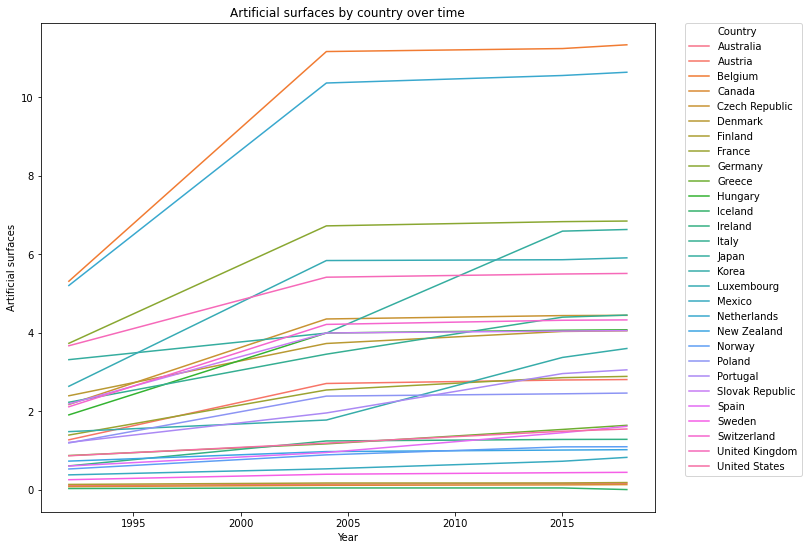

In [15]:
#plot the artifical surfaces over years by country
f, ax = plt.subplots(figsize=(11, 9))
ax.set_title('Artificial surfaces by country over time')

sns.lineplot(
    data=land_cover_OECD.reset_index(),
    x='Year',
    y='Artificial surfaces',
    hue="Country")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

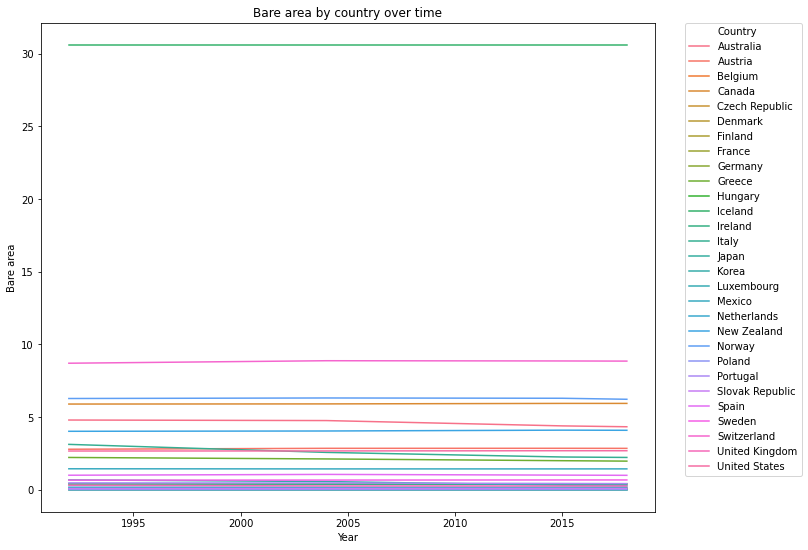

In [16]:
#plot the bare area over years by country
f, ax = plt.subplots(figsize=(11, 9))
ax.set_title('Bare area by country over time')

sns.lineplot(
    data=land_cover_OECD.reset_index(),
    x='Year',
    y='Bare area',
    hue="Country")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

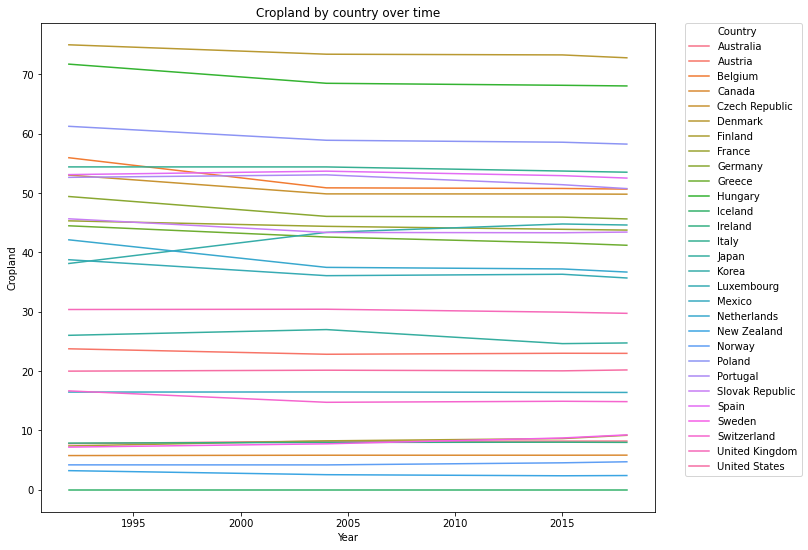

In [17]:
#plot the cropland over years by country
f, ax = plt.subplots(figsize=(11, 9))
ax.set_title('Cropland by country over time')

sns.lineplot(
    data=land_cover_OECD.reset_index(),
    x='Year',
    y='Cropland',
    hue="Country")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

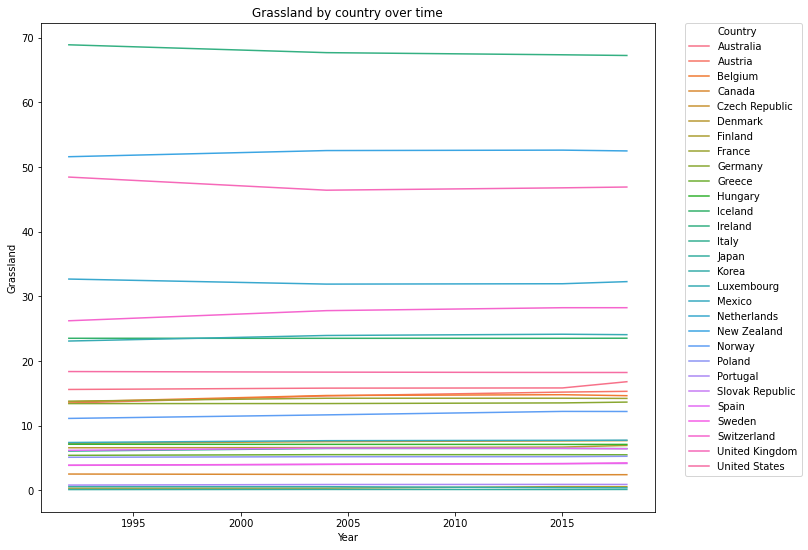

In [18]:
#plot the grassland over years by country
f, ax = plt.subplots(figsize=(11, 9))
ax.set_title('Grassland by country over time')

sns.lineplot(
    data=land_cover_OECD.reset_index(),
    x='Year',
    y='Grassland',
    hue="Country")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

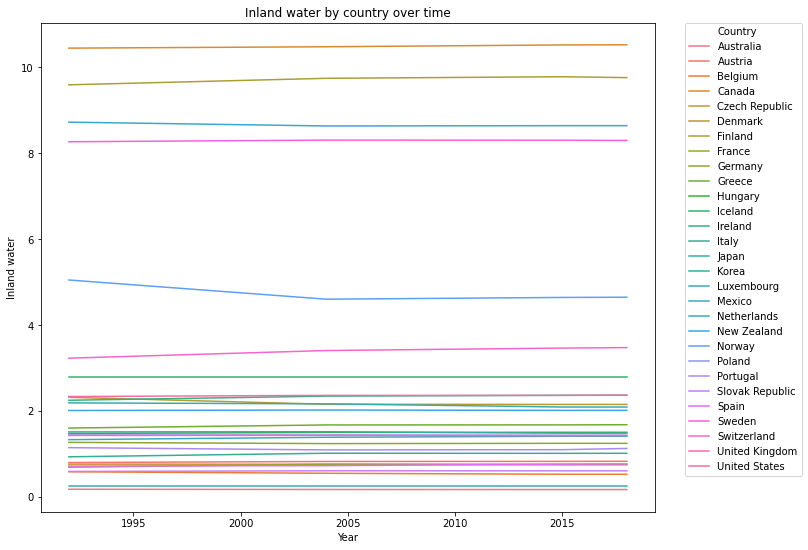

In [19]:
#plot the inland water over years by country
f, ax = plt.subplots(figsize=(11, 9))
ax.set_title('Inland water by country over time')

sns.lineplot(
    data=land_cover_OECD.reset_index(),
    x='Year',
    y='Inland water',
    hue="Country")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

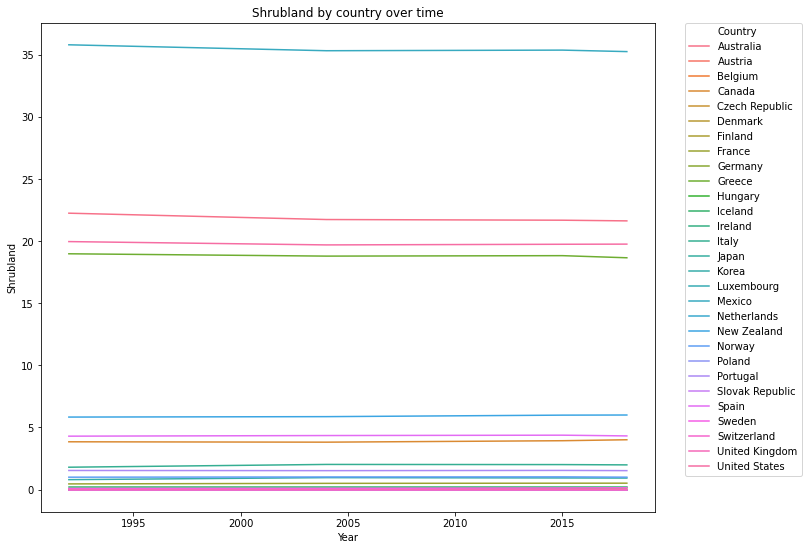

In [20]:
#plot the shrubland over years by country
f, ax = plt.subplots(figsize=(11, 9))
ax.set_title('Shrubland by country over time')

sns.lineplot(
    data=land_cover_OECD.reset_index(),
    x='Year',
    y='Shrubland',
    hue="Country")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

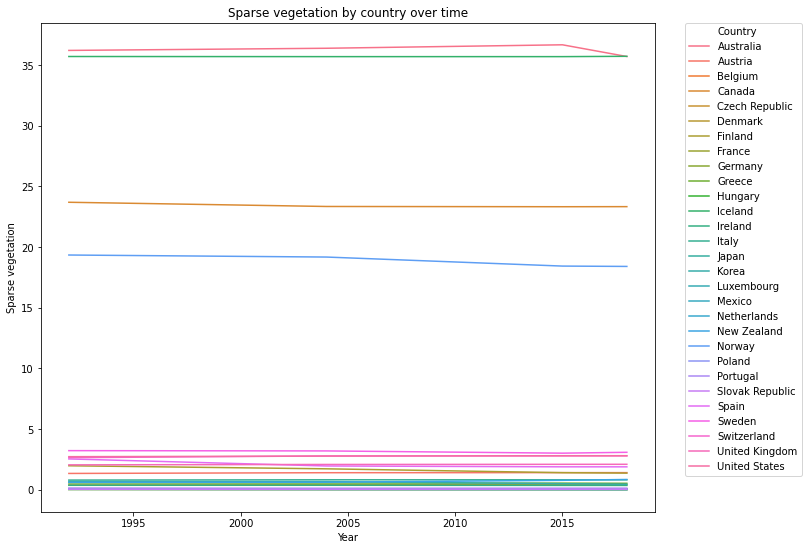

In [21]:
#plot the sparse vegetation over years by country
f, ax = plt.subplots(figsize=(11, 9))
ax.set_title('Sparse vegetation by country over time')

sns.lineplot(
    data=land_cover_OECD.reset_index(),
    x='Year',
    y='Sparse vegetation',
    hue="Country")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

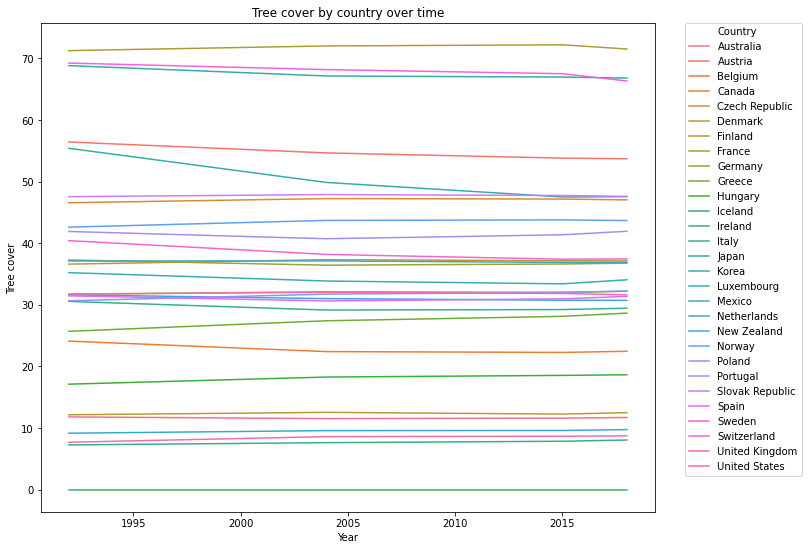

In [22]:
#plot the tree cover over years by country
f, ax = plt.subplots(figsize=(11, 9))
ax.set_title('Tree cover by country over time')

sns.lineplot(
    data=land_cover_OECD.reset_index(),
    x='Year',
    y='Tree cover',
    hue="Country")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

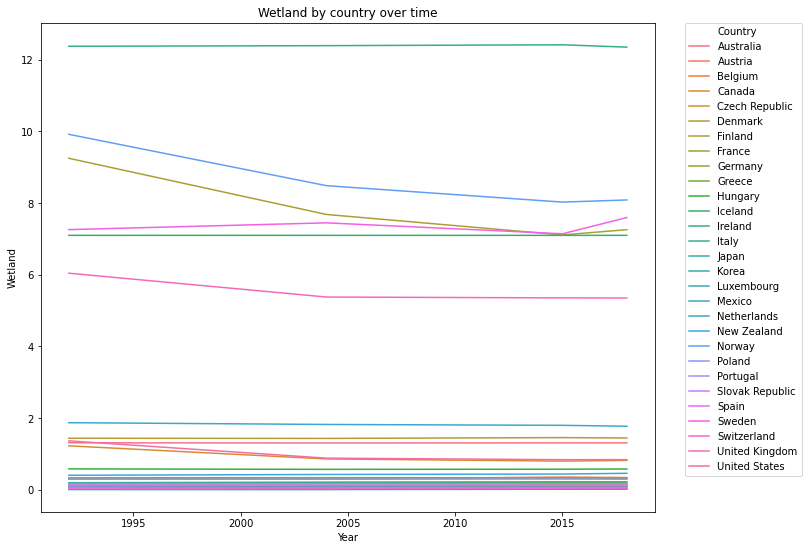

In [23]:
#plot the wetland over years by country
f, ax = plt.subplots(figsize=(11, 9))
ax.set_title('Wetland by country over time')

sns.lineplot(
    data=land_cover_OECD.reset_index(),
    x='Year',
    y='Wetland',
    hue="Country")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## Conclusions
For the artificial surfaces we can see a major change for our biggest timespan from 1992-2004 in some countries and for a few countries we can see a jump from 2004-2015. However for The shortest timespan from 2015-2018 we can hardly see any markable change across all variables. Excluding artificial surfaces, the data ist quite constant over the whole timespan, as we expected. Especially the ratio 2015/2018 suggests that one can use recent land cover data to approximate the data of the following years, as the properties don't significantly change over a short period of time. However a problem encountered is that for a few countries all entries of some values are 0 over all years. This can suggest that the data just isn't available for that country or that the % of given land cover is actually 0.

In [24]:
#extract our 2018 data
land_cover2018 =   land_cover.iloc[land_cover.index.get_level_values('Year') == 2018]
land_cover2018.shape

(236, 9)

In [25]:
#descriptive statistics
land_cover2018.describe()

,Artificial surfaces,Bare area,Cropland,Grassland,Inland water,Shrubland,Sparse vegetation,Tree cover,Wetland
count,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000
mean,3.274819,12.117159,27.178701,8.833833,5.794420,5.278640,3.060210,33.086850,1.375368
std,9.807513,26.336930,22.388281,15.280070,13.562647,10.848790,6.588589,28.104437,3.655866
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.123466,0.000000,7.806774,0.096397,0.799938,0.000000,0.008034,5.868930,0.001665
50%,0.569402,0.072513,23.364426,2.765517,1.674404,0.376116,0.139986,31.230774,0.118505
75%,1.965186,4.094473,43.805507,10.689944,4.474193,5.030730,3.081576,57.213742,0.700044
max,100.000000,99.871986,87.579618,88.624788,100.000000,76.679242,46.950629,97.392105,32.498908


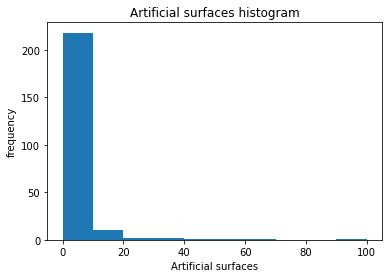

In [26]:
#plotting histograms to observe distributions
plt.hist(land_cover2018['Artificial surfaces'], bins = 10)
plt.title('Artificial surfaces histogram')
plt.xlabel('Artificial surfaces')
plt.ylabel('frequency')
plt.show()

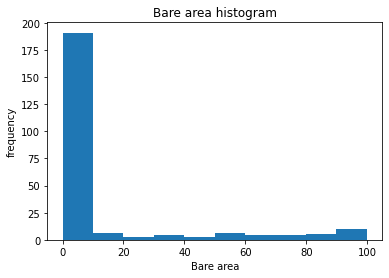

In [27]:
plt.hist(land_cover2018['Bare area'], bins = 10)
plt.title('Bare area histogram')
plt.xlabel('Bare area')
plt.ylabel('frequency')
plt.show()

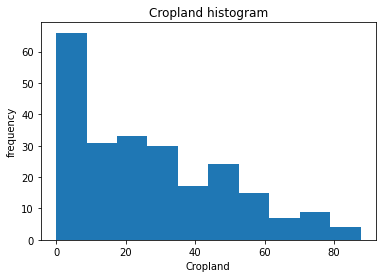

In [28]:
plt.hist(land_cover2018['Cropland'], bins = 10)
plt.title('Cropland histogram')
plt.xlabel('Cropland')
plt.ylabel('frequency')
plt.show()

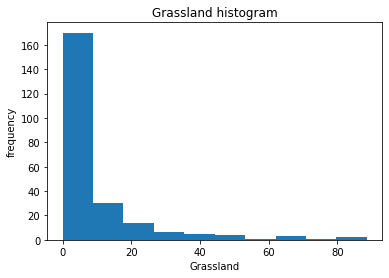

In [29]:
plt.hist(land_cover2018['Grassland'], bins = 10)
plt.title('Grassland histogram')
plt.xlabel('Grassland')
plt.ylabel('frequency')
plt.show()

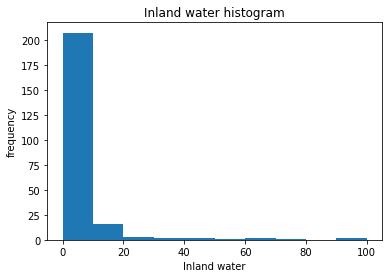

In [30]:
plt.hist(land_cover2018['Inland water'], bins = 10)
plt.title('Inland water histogram')
plt.xlabel('Inland water')
plt.ylabel('frequency')
plt.show()

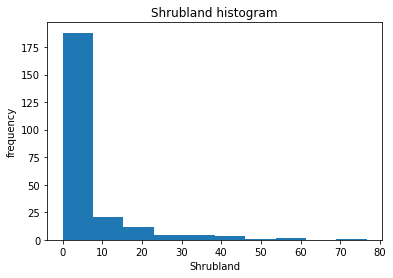

In [31]:
plt.hist(land_cover2018['Shrubland'], bins = 10)
plt.title('Shrubland histogram')
plt.xlabel('Shrubland')
plt.ylabel('frequency')
plt.show()

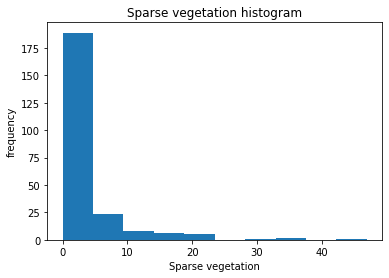

In [32]:
plt.hist(land_cover2018['Sparse vegetation'], bins = 10)
plt.title('Sparse vegetation histogram')
plt.xlabel('Sparse vegetation')
plt.ylabel('frequency')
plt.show()

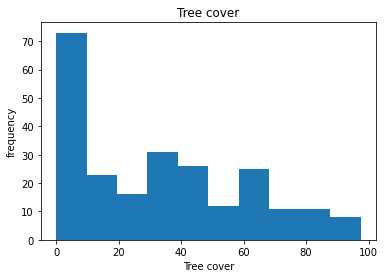

In [33]:
plt.hist(land_cover2018['Tree cover'], bins = 10)
plt.title('Tree cover')
plt.xlabel('Tree cover')
plt.ylabel('frequency')
plt.show()

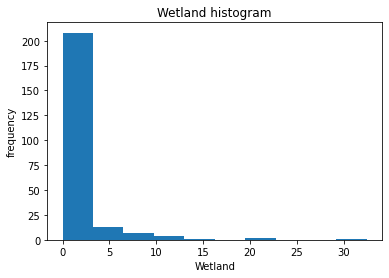

In [34]:
plt.hist(land_cover2018['Wetland'], bins = 10)
plt.title('Wetland histogram')
plt.xlabel('Wetland')
plt.ylabel('frequency')
plt.show()

In [41]:
land_cover2018.index = land_cover2018.index.droplevel('Year')
ladn

In [36]:
#write our 2018 data to csv
land_cover2018.to_csv(DATA_PATH / 'OECD' / 'LAND_COVER_2018_DATA.csv')